In [17]:
print(y.value_counts(normalize=True))


churn_numeric
0    0.73463
1    0.26537
Name: proportion, dtype: float64


# 📊 Telco Customer Churn Analysis

## Dashboard Summary

- **Total Customers:** 7043

- **Churn Count:** 1869 (26.54%)

- **Avg Monthly Charge:** $64.76

### Top 3 Insights

1. Month-to-month contracts have higher churn.

2. Higher monthly charges increase churn risk.

3. No device protection plan correlates with higher churn.

### Key Recommendation

- Incentivize month-to-month customers to switch to annual contracts.

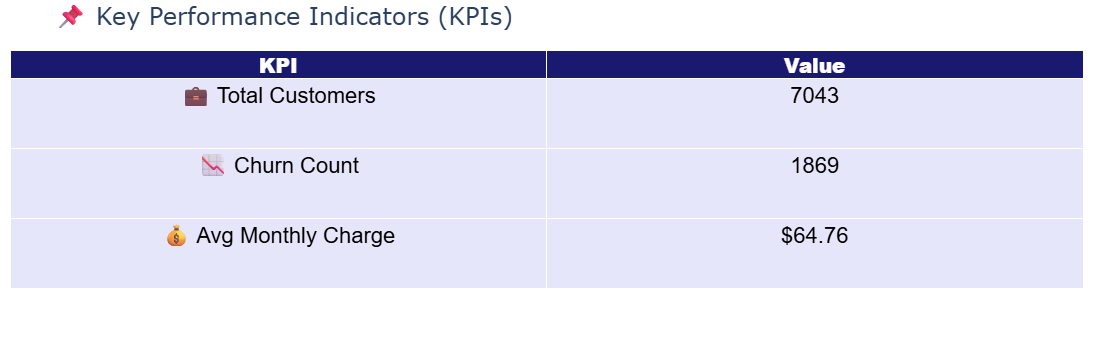

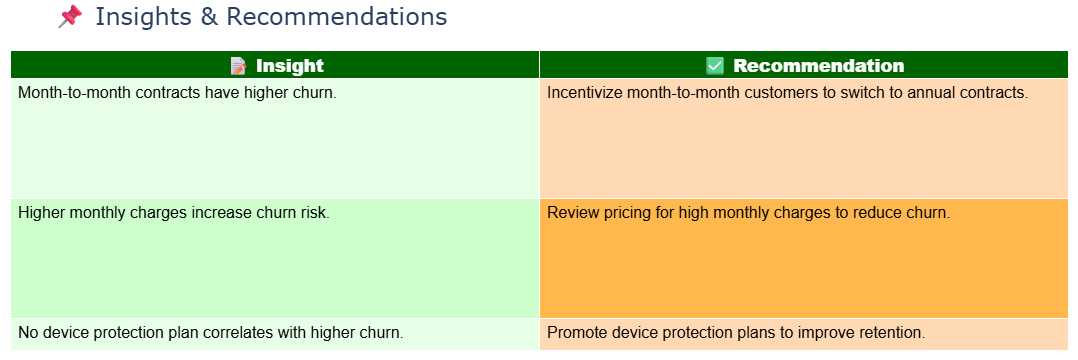

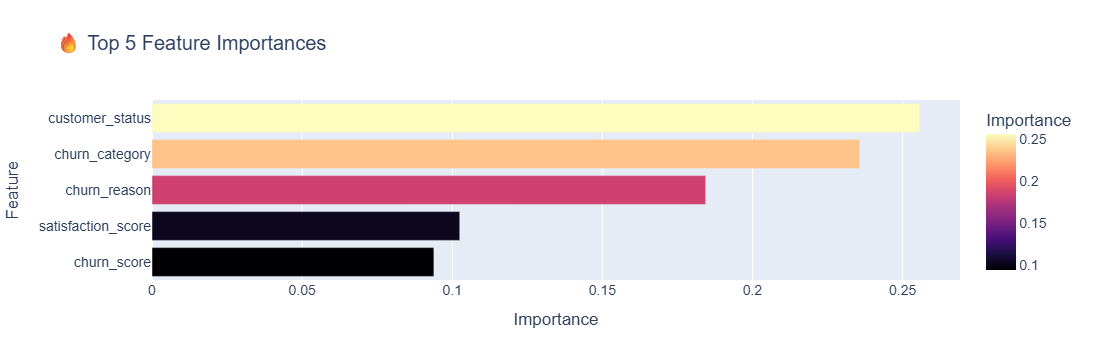

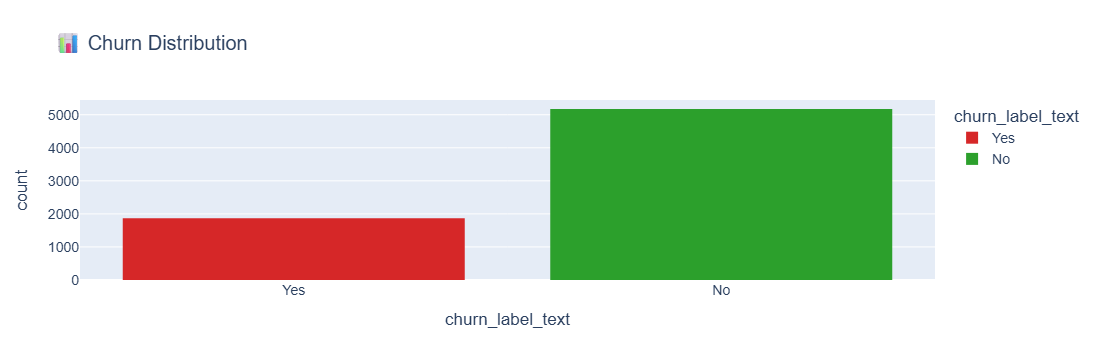

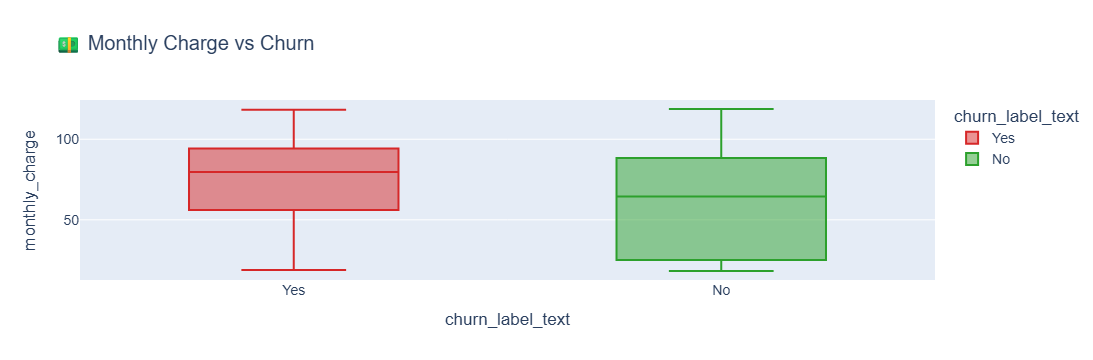

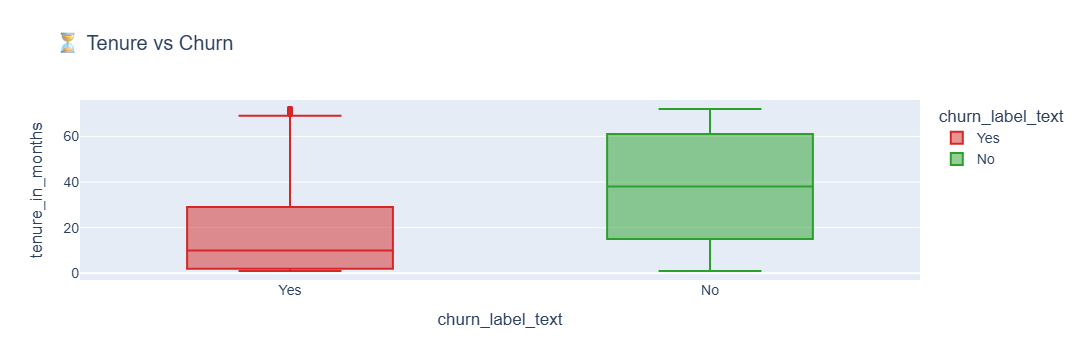

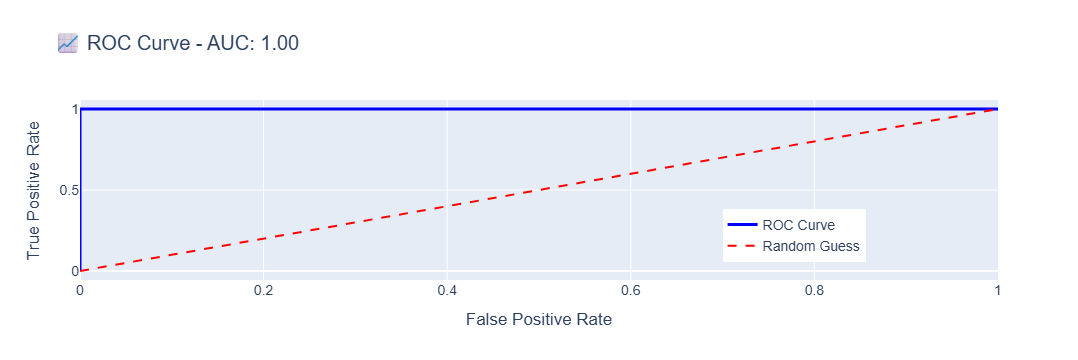

===== Confusion Matrix =====
[[1552    0]
 [   0  561]]

===== Classification Report =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

⚡ 'images' folder already exists.


In [1]:
import os

# Make sure images/ folder exists
if not os.path.exists("images"):
    os.makedirs("images")

def save_and_show_plot(filename):
    """Helper to save plot in images/ and display it"""
    plt.savefig(f"images/{filename}", dpi=300, bbox_inches="tight")
    plt.show()

# ---------------------------
import pandas as pd
from IPython.display import display, Markdown

# Load data
data = pd.read_csv('Telco.csv')
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Quick metrics
total_customers = len(data)
churn_count = data['churn_label'].map({'Yes':1,'No':0}).sum()
churn_rate = round(churn_count / total_customers * 100,2)
avg_monthly_charge = round(data['monthly_charge'].mean(),2)

display(Markdown("# 📊 Telco Customer Churn Analysis"))
display(Markdown("## Dashboard Summary"))
display(Markdown(f"- **Total Customers:** {total_customers}"))
display(Markdown(f"- **Churn Count:** {churn_count} ({churn_rate}%)"))
display(Markdown(f"- **Avg Monthly Charge:** ${avg_monthly_charge}"))

# Top 3 Insights
insights = [
    "Month-to-month contracts have higher churn.",
    "Higher monthly charges increase churn risk.",
    "No device protection plan correlates with higher churn."
]

# Key Recommendation
recommendation = "Incentivize month-to-month customers to switch to annual contracts."

display(Markdown("### Top 3 Insights"))
for i, insight in enumerate(insights,1):
    display(Markdown(f"{i}. {insight}"))

display(Markdown("### Key Recommendation"))
display(Markdown(f"- {recommendation}"))

# ---------------------------
# 2. Collapsible Code: Preprocessing & Modeling
# ---------------------------
# %% [markdown]
# <details><summary>Click to Expand: Data Preprocessing & Modeling Code</summary>

# %% [code]
# Imports
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib

# Drop unnecessary columns
data.drop(columns=[c for c in ['zip_code','latitude','longitude','customer_id'] if c in data.columns], inplace=True)

# Total charges numeric
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'] = data['total_charges'].fillna(data['total_charges'].median())


# Encode categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols = [c for c in categorical_cols if c != 'churn_label']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
    joblib.dump(le, f'{col}_encoder.pkl')

# Encode target
data['churn_label'] = data['churn_label'].map({'Yes':1, 'No':0})

# Features & Target
X = data.drop('churn_label', axis=1)
y = data['churn_label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]
# </details>

# ---------------------------
# 3. KPIs Table (Interactive)
# ---------------------------
kpi_names = ["💼 Total Customers", "📉 Churn Count", "💰 Avg Monthly Charge"]
kpi_values = [total_customers, churn_count, f"${avg_monthly_charge}"]

kpi_table = go.Figure(data=[go.Table(
    header=dict(values=["KPI", "Value"], fill_color='midnightblue', font=dict(color='white', size=20, family='Arial Black'), align='center'),
    cells=dict(values=[kpi_names, kpi_values], fill_color='lavender', font=dict(color='black', size=22, family='Arial'), align='center', height=70, line_color='white')
)])
kpi_table.update_layout(title=dict(text="📌 Key Performance Indicators (KPIs)", font=dict(size=24)), margin=dict(l=10, r=10, t=50, b=10))
kpi_table.show()

# ---------------------------
# 4. Insights & Recommendations Table
# ---------------------------
insights_full = [
    "Month-to-month contracts have higher churn.",
    "Higher monthly charges increase churn risk.",
    "No device protection plan correlates with higher churn.",
    "Fiber optic internet users churn more than DSL.",
    "Longer tenure and long-term contracts reduce churn."
]
recommendations_full = [
    "Incentivize month-to-month customers to switch to annual contracts.",
    "Review pricing for high monthly charges to reduce churn.",
    "Promote device protection plans to improve retention.",
    "Provide special support or perks for Fiber optic users.",
    "Encourage longer contract durations through loyalty programs."
]

insight_table = go.Figure(data=[go.Table(
    header=dict(values=["📝 Insight", "✅ Recommendation"], fill_color='darkgreen', font=dict(color='white', size=18, family='Arial Black'), align='center'),
    cells=dict(values=[insights_full, recommendations_full], fill_color=[['#e6ffe6','#ccffcc','#e6ffe6','#ccffcc','#e6ffe6'], ['#ffd9b3','#ffb84d','#ffd9b3','#ffb84d','#ffd9b3']], font=dict(color='black', size=16, family='Arial'), align='left', height=120, line_color='white')
)])
insight_table.update_layout(title=dict(text="📌 Insights & Recommendations", font=dict(size=24)), margin=dict(l=10, r=10, t=50, b=10))
insight_table.show()

# ---------------------------
# 5. Top 5 Feature Importance
# ---------------------------
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top5_feat = feat_imp.sort_values(by='Importance', ascending=False).head(5)

fig_feat = px.bar(top5_feat, x='Importance', y='Feature', orientation='h', color='Importance', color_continuous_scale='Magma', title='🔥 Top 5 Feature Importances')
fig_feat.update_layout(yaxis={'categoryorder':'total ascending'}, font=dict(family='Arial', size=14))
fig_feat.show()

# ---------------------------
# 6. Interactive Charts (Examples)
# ---------------------------
data['churn_label_text'] = data['churn_label'].map({0:'No',1:'Yes'})

fig1 = px.histogram(data, x='churn_label_text', color='churn_label_text', color_discrete_map={'No':'#2ca02c','Yes':'#d62728'}, title='📊 Churn Distribution')
fig1.update_layout(font=dict(family="Arial", size=14))
fig1.show()

fig2 = px.box(data, x='churn_label_text', y='monthly_charge', color='churn_label_text', color_discrete_map={'No':'#2ca02c','Yes':'#d62728'}, title='💵 Monthly Charge vs Churn')
fig2.update_layout(font=dict(family="Arial", size=14))
fig2.show()

fig3 = px.box(data, x='churn_label_text', y='tenure_in_months', color='churn_label_text', color_discrete_map={'No':'#2ca02c','Yes':'#d62728'}, title='⏳ Tenure vs Churn')
fig3.update_layout(font=dict(family="Arial", size=14))
fig3.show()

# You can add more charts similarly...

# ---------------------------
# 7. ROC Curve & Model Evaluation
# ---------------------------
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

roc_fig = go.Figure()

# ROC curve line
roc_fig.add_trace(go.Scatter(
    x=fpr, y=tpr, mode='lines', name='ROC Curve',
    line=dict(color='blue', width=3)
))

# Random guess line
roc_fig.add_trace(go.Scatter(
    x=[0,1], y=[0,1], mode='lines', name='Random Guess',
    line=dict(color='red', width=2, dash='dash')
))

roc_fig.update_layout(
    title=f"📈 ROC Curve - AUC: {roc_auc:.2f}",
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    font=dict(family='Arial', size=14),
    legend=dict(x=0.7, y=0.1)
)

roc_fig.show()

# Optional: Confusion matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report
print("===== Confusion Matrix =====")
print(confusion_matrix(y_test, y_pred))
print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))

import os

# Create folder if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")
    print("✅ 'images' folder created successfully!")
else:
    print("⚡ 'images' folder already exists.")



In [59]:
print(data.columns.tolist())


['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married', 'dependents', 'number_of_dependents', 'country', 'state', 'city', 'population', 'quarter', 'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'customer_status', 'churn_label', 'churn_score', 'cltv', 'churn_category', 'churn_reason']
